In [2]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

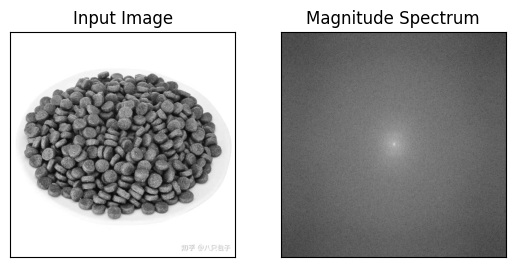

In [8]:
img = cv2.imread('1.jpg')
img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
f = np.fft.fft2(img)
fshift = np.fft.fftshift(f)
magnitude_spectrum = 20*np.log(np.abs(fshift))
plt.subplot(121),plt.imshow(img, cmap = 'gray')
plt.title('Input Image'), plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(magnitude_spectrum, cmap = 'gray')
plt.title('Magnitude Spectrum'), plt.xticks([]), plt.yticks([])
plt.show()

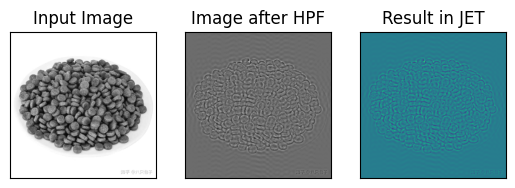

In [9]:
rows, cols = img.shape
crow,ccol = rows//2 , cols//2
fshift[crow-30:crow+31, ccol-30:ccol+31] = 0
f_ishift = np.fft.ifftshift(fshift)
img_back = np.fft.ifft2(f_ishift)
img_back = np.real(img_back)
plt.subplot(131),plt.imshow(img, cmap = 'gray')
plt.title('Input Image'), plt.xticks([]), plt.yticks([])
plt.subplot(132),plt.imshow(img_back, cmap = 'gray')
plt.title('Image after HPF'), plt.xticks([]), plt.yticks([])
plt.subplot(133),plt.imshow(img_back)
plt.title('Result in JET'), plt.xticks([]), plt.yticks([])
plt.show()

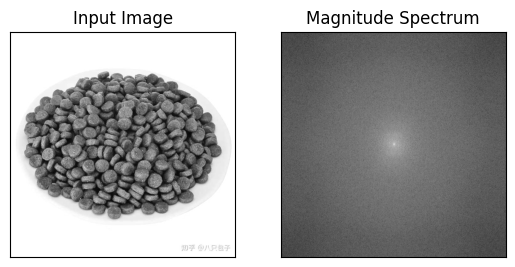

In [11]:
import numpy as np
import cv2 as cv
from matplotlib import pyplot as plt
img = cv.imread('1.jpg',0)
dft = cv.dft(np.float32(img),flags = cv.DFT_COMPLEX_OUTPUT)
dft_shift = np.fft.fftshift(dft)
magnitude_spectrum = 20*np.log(cv.magnitude(dft_shift[:,:,0],dft_shift[:,:,1]))
plt.subplot(121),plt.imshow(img, cmap = 'gray')
plt.title('Input Image'), plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(magnitude_spectrum, cmap = 'gray')
plt.title('Magnitude Spectrum'), plt.xticks([]), plt.yticks([])
plt.show()

360.0 360.0


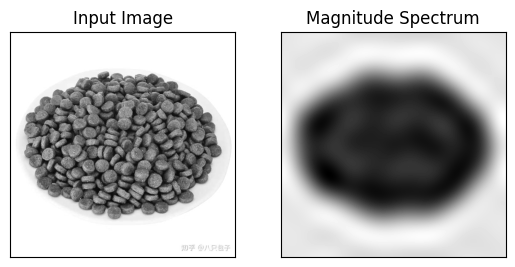

In [16]:
rows, cols = img.shape
crow,ccol = rows/2 , cols/2
# 首先创建一个掩码，中心正方形为1，其余全为零
mask = np.zeros((rows,cols,2),np.uint8)
print(crow, ccol)
mask[ int(crow-5): int(crow+5), int(ccol-5): int(ccol+5)] = 1
# 应用掩码和逆DFT
fshift = dft_shift*mask
f_ishift = np.fft.ifftshift(fshift)
img_back = cv.idft(f_ishift)
img_back = cv.magnitude(img_back[:,:,0],img_back[:,:,1])
plt.subplot(121),plt.imshow(img, cmap = 'gray')
plt.title('Input Image'), plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(img_back, cmap = 'gray')
plt.title('Magnitude Spectrum'), plt.xticks([]), plt.yticks([])
plt.show()

In [19]:
import torch

c:\Users\dyj\.conda\envs\test2\lib\site-packages\tqdm\auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [45]:
a = [[],[]]
a[0] += [torch.tensor([1,2,3,4]).unsqueeze(0)]
a[0] += [torch.tensor([1,2,3,4]).unsqueeze(0)]
a[1] += [torch.tensor([2,3,4,5]).unsqueeze(0)]
a[1] += [torch.tensor([2,3,4,5]).unsqueeze(0)]

In [46]:
a[0] = torch.cat(a[0],0).unsqueeze(0)
a[1] = torch.cat(a[1],0).unsqueeze(0)
a.shape

AttributeError: 'list' object has no attribute 'shape'

In [42]:
t,_ = torch.cat(a,0)[0].view(-1, 2).max(dim=0)
t

tensor([3, 4])

In [53]:
b = torch.arange(4*4*3*1).reshape(4,4,3,1)
torch.sum(b>3, dim=2).shape

torch.Size([4, 4, 1])

In [51]:
a[0].shape

torch.Size([1, 2, 4])

In [54]:
b[0].shape

torch.Size([4, 3, 1])

In [62]:
import torch
import torchvision

# 创建RoIAlign层
pooler = torchvision.ops.RoIAlign(output_size=2,sampling_ratio=-1,spatial_scale=1,aligned=True)

# 输入一个 8x8 的feature：
inputTensor = torch.rand(1,2,8,8)

box =  torch.tensor([[0.0,0.375,0.875,0.625],[0.0,0.375,0.875,0.625]]) 

output = pooler(inputTensor,[box])#shape:[1, 1, 2, 2]
output.shape

torch.Size([2, 2, 2, 2])

In [65]:
torch.cat([output,output],0).shape,output.shape

(torch.Size([4, 2, 2, 2]), torch.Size([2, 2, 2, 2]))

In [66]:
path = r'D:\works\projects\shimopian_continual_learning_cam01\shimopian_7x_cam01_init\train\labels'

In [70]:
import os
categories = set()
for file in os.listdir(path):
    array = np.loadtxt(os.path.join(path, file))
    if len(array.shape) == 1:
        array = array[np.newaxis, :]
    if len(array.shape) == 2:
        for i in range(array.shape[0]):
            categories.add(int(array[i,0]))
print(categories)

{1, 3, 4, 5, 6}


In [71]:
from pathlib import Path

In [73]:
p = Path(r'a.jpg')

In [76]:
p.name

'a.jpg'